In [75]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Choose an ETF with a minimum of 100 assets, identify those assets
# Get the list of S&P 500 constituents
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Step 2: Retrieve historical data for your chosen ETF, we want adjusted close
df = yf.download(tickers, period = '10y')

# Drop na's, get adjusted close prices, removed nulls to clean data, remove what we dont need.
sp500 = df['Adj Close'].dropna(how= 'all', axis= 1)
sp500

[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['-', 'BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-09,36.156071,23.191441,17.735157,33.997093,NaN,30.671644,19.543333,63.089127,55.439999,39.328117,...,151.363647,20.543488,62.336411,43.885616,29.539299,44.160706,82.854164,51.689999,23.840527,29.558243
2013-12-10,36.339935,23.455408,17.707598,34.614491,NaN,30.597443,19.320000,63.324265,55.320000,39.247864,...,153.585037,20.339363,62.251873,44.346897,29.460257,43.631729,82.352242,50.910000,23.543226,29.195175
2013-12-11,36.011597,24.501846,17.576410,34.966343,NaN,30.160440,19.126667,62.476105,54.639999,39.055275,...,153.203476,20.120661,61.308754,44.734371,28.906879,43.328617,80.971939,50.570000,22.916485,28.943811
2013-12-12,36.287399,23.992777,17.550737,34.780457,NaN,29.921345,19.126667,62.207413,53.990002,38.605911,...,152.177628,20.251883,62.024212,44.503742,29.433901,42.555943,80.667206,50.680000,23.125401,29.018286
2013-12-13,36.221718,24.728109,17.359426,34.767174,NaN,30.012033,19.006666,62.089844,60.889999,38.846634,...,154.102173,20.222723,61.991711,44.134701,29.697416,42.680763,81.124313,50.299999,22.876301,29.399986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,128.880005,13.350000,189.429993,144.149994,133.699997,105.190002,81.989998,336.429993,604.559998,183.259995,...,83.889999,61.470001,102.430000,32.730000,106.470001,125.650002,116.889999,239.369995,38.680000,182.119995
2023-12-05,127.879997,13.130000,193.419998,144.570007,133.710007,104.349998,81.849998,335.829987,602.219971,180.630005,...,82.209999,61.029999,100.440002,32.180000,105.790001,124.379997,115.820000,234.360001,37.389999,179.649994
2023-12-06,128.910004,13.480000,192.320007,146.380005,135.309998,104.940002,79.970001,335.410004,595.700012,180.570007,...,82.400002,61.970001,99.110001,32.209999,106.099998,124.809998,116.129997,234.130005,37.150002,182.000000


In [4]:
# 20 day lag time period 
starting_period = -20 -252
end_period = -20
lagged_closed_price = sp500[starting_period : end_period]

# calculating 52 Week trend 
polyfit_regression = np.polyfit((range(0,252)), lagged_closed_price, 1) 
# The first parameter of our regression is x, 0-252 days. Second is the y, Closing price for slice of data with 20 - day lag
slope_info = pd.DataFrame(polyfit_regression) # Convert so that we can use the results
slope_info.columns = sp500.columns # Setting column names to match ticker
_52_week_trend= slope_info.iloc[0] # Only need first row 
_52_week_trend

A      -0.200299
AAL    -0.005181
AAPL    0.209123
ABBV   -0.035755
ABNB    0.157446
          ...   
YUM     0.001583
ZBH    -0.028876
ZBRA   -0.209524
ZION   -0.074297
ZTS     0.117431
Name: 0, Length: 501, dtype: float64

In [5]:
# pct above 260 day low 
# Observe the difference of price, then divide over the low
current_price_minus_min = sp500.iloc[-20] - lagged_closed_price.min()
percent_above_260 = (current_price_minus_min / lagged_closed_price.min()) * 100
percent_above_260

A        7.215581
AAL      8.058609
AAPL    49.929518
ABBV     6.806291
ABNB    43.229488
          ...    
YUM      8.344087
ZBH      2.628502
ZBRA     4.136566
ZION    72.098768
ZTS     28.305570
Length: 501, dtype: float64

In [6]:
# Close - 4wk low , divided by 4week high - 4week low)
# subtract 
# Close - 52wk low , divided by 52week high - 52week low)

# The equation is same, use for loop and change index from 4week to 52 week
# 4 week is 40 because there are 20 data entries in 5 weeks, plus the 20 day lag
# 52 week is 272 because there are 252 data entries in 52 weeks, plus the 20 day lag 
data_indexes = (40, 272)
oscillator_ratios = []
for index in data_indexes:
    close_minus_low= sp500.iloc[-20] - sp500[-index:].min()
    ratio = close_minus_low / (sp500[-index:].max() - sp500[-index:].min())
    oscillator_ratios.append(ratio)

oscillator = (oscillator_ratios[0] - oscillator_ratios[1]) *100
oscillator


A       13.510952
AAL     18.263929
AAPL   -18.754270
ABBV   -19.369122
ABNB   -35.069874
          ...    
YUM     36.902175
ZBH      9.144881
ZBRA    13.362717
ZION    -2.134703
ZTS     -7.981684
Length: 501, dtype: float64

In [7]:
# 39 week returns 
# im going to use 5 data entries per week so were looking at 39 * 5, 195 data entries + 20 day lag is 215

price_39_weeks_ago = sp500.iloc[-215] 
price_difference_39_weeks = sp500.iloc[-20] - price_39_weeks_ago # current minus 29 weeks ago
_39_week_returns_= price_difference_39_weeks / price_39_weeks_ago # Rate of change formula
_39_week_returns_ 


A      -0.298562
AAL    -0.308324
AAPL    0.242818
ABBV   -0.013871
ABNB   -0.003122
          ...   
YUM    -0.003855
ZBH    -0.167832
ZBRA   -0.401857
ZION   -0.363270
ZTS    -0.003135
Length: 501, dtype: float64

In [8]:
volume =df['Volume'].dropna(how= 'all', axis= 1)

weekly_means = sp500[starting_period:end_period].rolling(5).mean() 
weekly_volume = volume.rolling(5).mean()

vpt = weekly_means.pct_change() * weekly_volume 
volume_price_trend = vpt.sum() 
volume_price_trend

A      -6.457844e+05
AAL    -6.890580e+06
AAPL    1.199572e+07
ABBV   -2.963838e+05
ABNB    8.843513e+05
            ...     
YUM     9.757124e+04
ZBH    -1.543405e+05
ZBRA   -2.323121e+05
ZION   -5.123828e+06
ZTS     6.619102e+05
Length: 501, dtype: float64

In [9]:
new_table = pd.DataFrame(index=sp500.transpose().index)
new_table['Slope 52 Week Trend-Line'] = _52_week_trend
new_table['Percent above 260'] = percent_above_260
new_table['4/52 Week Oscillator'] = oscillator
new_table['39 Week Return'] = _39_week_returns_
new_table['51 Week Volume Price Trend'] = volume_price_trend
new_table # Needs a a better name

,Slope 52 Week Trend-Line,Percent above 260,4/52 Week Oscillator,39 Week Return,51 Week Volume Price Trend
A,-0.200299,7.215581,13.510952,-0.298562,-6.457844e+05
AAL,-0.005181,8.058609,18.263929,-0.308324,-6.890580e+06
AAPL,0.209123,49.929518,-18.754270,0.242818,1.199572e+07
ABBV,-0.035755,6.806291,-19.369122,-0.013871,-2.963838e+05
ABNB,0.157446,43.229488,-35.069874,-0.003122,8.843513e+05
...,...,...,...,...,...
YUM,0.001583,8.344087,36.902175,-0.003855,9.757124e+04
ZBH,-0.028876,2.628502,9.144881,-0.167832,-1.543405e+05
ZBRA,-0.209524,4.136566,13.362717,-0.401857,-2.323121e+05
ZION,-0.074297,72.098768,-2.134703,-0.363270,-5.123828e+06


In [15]:
z_scores = (new_table - new_table.mean()) / new_table.std()
z_scores = z_scores.sum(axis=1)

In [21]:
z_scores.sort_values(ascending=True, inplace= True)
long_basket= z_scores[-10:]
short_basket = z_scores[:10]

print("Long Basket:", long_basket)
print("Short Basket:", short_basket)

Long Basket: AMZN     7.898064
FICO     8.244426
LLY      8.307441
AVGO     9.951239
BKNG    11.851400
AMD     12.654577
TSLA    13.614203
NVR     15.414624
META    19.580681
NVDA    28.401479
dtype: float64
Short Basket: SEDG   -6.911874
ENPH   -6.756220
KEY    -5.140884
F      -5.033159
MRNA   -4.743600
ALB    -4.503503
MTD    -4.135131
BAC    -4.055288
ILMN   -4.034268
SCHW   -3.987627
dtype: float64


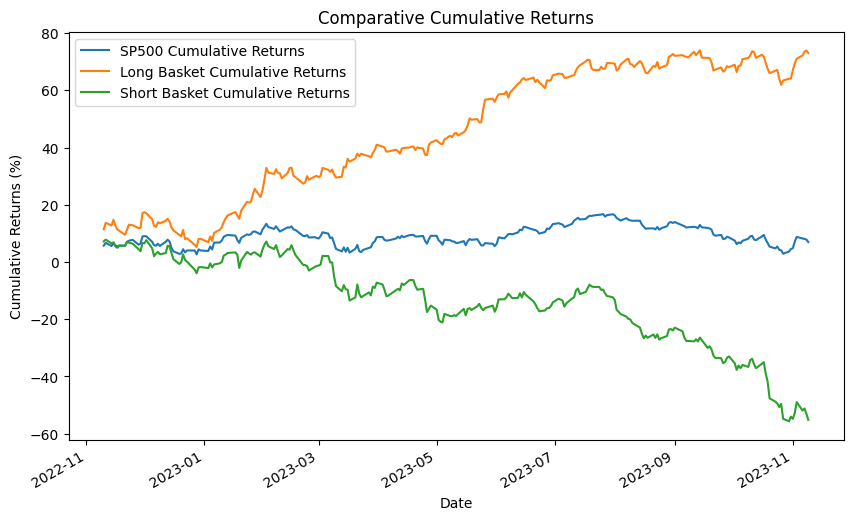

In [79]:
#Back-Test period of 1 year (20 Day Lag)

long_list =long_basket.index
short_list= short_basket.index

long_basket_close =sp500[-272:-20][long_list]
short_basket_close =sp500[-272:-20][short_list]


# I should make this next part a function, for autonomy
returns = sp500[-272:-20].pct_change()*100
returns = returns.mean(axis=1)
cumulative_returns = returns.cumsum()

long_returns = long_basket_close.pct_change()*100
long_returns = long_returns.mean(axis=1)
long_cumulative_returns = long_returns.cumsum()

short_returns = short_basket_close.pct_change()*100
short_returns = short_returns.mean(axis=1)
short_cumulative_returns = short_returns.cumsum()



plt.figure(figsize=(10,6))
cumulative_returns.plot(label='SP500 Cumulative Returns')
long_cumulative_returns.plot(label='Long Basket Cumulative Returns')
short_cumulative_returns.plot(label='Short Basket Cumulative Returns')

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.show()


